### Justin Thomas Project - L00143759

Snooker dataset from Kaggle. Originally scraped from cuetracker.net.
The 4 files were uploaded to Colab from https://www.kaggle.com/rusiano/snooker-data-19822020

In [1]:
# download pandas package and read in matches dataset
import pandas as pd

matches_df  = pd.read_csv('matches_r.csv')
matches_df

,tournament_id,match_id,date,stage,best_of,player1_name,player1_url,player2_name,player2_url,score1,score2,frames_scores,is_walkover
0,753,82716,NaN,Final,31,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Alex Higgins,https://cuetracker.net/players/alex-higgins,16,15,20-58; 31-90; 56-52; 26-87(67); 0-114(67); 73(...,False
1,753,82718,NaN,Semi-final,17,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Tony Meo,https://cuetracker.net/players/tony-meo,9,7,71-8; 50-71(55); 31-62; 69-30; 73-61; 34-77(52...,False
2,753,82717,NaN,Semi-final,17,Alex Higgins,https://cuetracker.net/players/alex-higgins,Ray Reardon,https://cuetracker.net/players/ray-reardon,9,6,28-71; 67(50)-29; 74(74)-0; 53-79; 60-54; 112(...,False
3,753,82721,NaN,Quarter-final,17,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Steve Davis,https://cuetracker.net/players/steve-davis,9,6,"1-103; 117(60,57)-6; 5-105(60); 57-60; 79-0; 2...",False
4,753,82719,NaN,Quarter-final,17,Alex Higgins,https://cuetracker.net/players/alex-higgins,John Spencer,https://cuetracker.net/players/john-spencer,9,5,69(54)-31; 103-21; 72-48; 33-82; 40-56; 71-51;...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193525,3275,203168,2019-10-08,Group 1,5,Neil Robertson,https://cuetracker.net/players/neil-robertson,Luca Brecel,https://cuetracker.net/players/luca-brecel,3,1,NaN,False
193526,3275,203174,2019-10-08,Group 1,5,Neil Robertson,https://cuetracker.net/players/neil-robertson,Jack Lisowski,https://cuetracker.net/players/jack-lisowski,3,1,NaN,False
193527,3275,203167,2019-10-07,Group 1,5,Mark Selby,https://cuetracker.net/players/mark-selby,Luca Brecel,https://cuetracker.net/players/luca-brecel,3,0,NaN,False
193528,3275,203169,2019-10-08,Group 1,5,Mark Selby,https://cuetracker.net/players/mark-selby,Ryan Day,https://cuetracker.net/players/ryan-day,3,2,NaN,False


Read in the other 3 csvs.

In [2]:
import pandas as pd

url = 'players_r.csv'

players_df = pd.read_csv(url)
players_df

,url,id,first_name,last_name,full_name,country
0,https://cuetracker.net/players/mohammed-a-belg...,mohammed-a-belgaizi,Mohammed,A Belgaizi,Mohammed A Belgaizi,United Arab Emirates
1,https://cuetracker.net/players/ishaq-a-khaleg,ishaq-a-khaleg,Ishaq,A Khaleg,Ishaq A Khaleg,Bahrain
2,https://cuetracker.net/players/ahmed-a-asere,ahmed-a-asere,Ahmed,A. Asere,Ahmed A. Asere,Saudi Arabia
3,https://cuetracker.net/players/magnus-aagaard,magnus-aagaard,Magnus,Aagaard,Magnus Aagaard,Denmark
4,https://cuetracker.net/players/asbjorn-aalberg,asbjorn-aalberg,Asbjorn,Aalberg,Asbjorn Aalberg,Norway
...,...,...,...,...,...,...
13635,https://cuetracker.net/players/rob-zwerver,rob-zwerver,Rob,Zwerver,Rob Zwerver,Netherlands
13636,https://cuetracker.net/players/stephen-zwerver,stephen-zwerver,Stephen,Zwerver,Stephen Zwerver,Netherlands
13637,https://cuetracker.net/players/vitalij-zwillin...,vitalij-zwilling-sen,Vitalij,Zwilling Sen,Vitalij Zwilling Sen,Germany
13638,https://cuetracker.net/players/marjus-zyla,marjus-zyla,Marjus,Zyla,Marjus Zyla,Albania


In [3]:
url = 'tournaments.csv'

tournaments_df = pd.read_csv(url)
tournaments_df

,id,season,year,name,full_name,url,status,category,prize,country,city
0,753,1982-1983,1982,UK Championship,1982 UK Championship,https://cuetracker.net/tournaments/uk-champion...,Professional,Non-ranking,47000.0,England,Preston
1,1140,1982-1983,1982,World Amateur Championship - Men,1982 World Amateur Championship - Men,https://cuetracker.net/tournaments/world-amate...,Amateur,World Event,0.0,Canada,Calgary
2,762,1982-1983,1982,Professional Players Tournament,1982 Professional Players Tournament,https://cuetracker.net/tournaments/professiona...,Professional,Ranking,31500.0,England,Birmingham
3,2586,1982-1983,1982,Pontins Autumn Open,1982 Pontins Autumn Open,https://cuetracker.net/tournaments/pontins-aut...,Pro-am,Event,0.0,Wales,Prestatyn
4,754,1982-1983,1982,International Open,1982 International Open,https://cuetracker.net/tournaments/internation...,Professional,Ranking,73500.0,England,Derby
...,...,...,...,...,...,...,...,...,...,...,...
2715,2884,2018-2019,2019,Guernsey Amateur Championship,2019 Guernsey Amateur Championship,https://cuetracker.net/tournaments/guernsey-am...,Amateur,National Championship,0.0,Guernsey,Various
2716,3321,2019-2020,2020,English Amateur Championship,2020 English Amateur Championship,https://cuetracker.net/tournaments/english-ama...,Amateur,National Championship,0.0,England,Cheltenham
2717,3362,NaN,2020,3 Kings Open,2020 3 Kings Open,https://cuetracker.net/tournaments/3-kings-ope...,Pro-am,Event,0.0,Austria,Rankweil
2718,3357,2019-2020,2020,Singapore Amateur Championship,2020 Singapore Amateur Championship,https://cuetracker.net/tournaments/singapore-a...,Amateur,National Championship,0.0,Singapore,Singapore


In [4]:
url = 'scores.csv'

scores_df = pd.read_csv(url)
scores_df

,match_id,frame,player,score,50plus_breaks_str
0,82716,1,1,20,NaN
1,82716,1,2,58,NaN
2,82716,2,1,31,NaN
3,82716,2,2,90,NaN
4,82716,3,1,56,NaN
...,...,...,...,...,...
934711,203177,3,2,4,NaN
934712,203177,4,1,64,NaN
934713,203177,4,2,75,52
934714,203177,5,1,69,50


Next we explore the data.
Head shows us the first 5 rows

In [5]:
matches_df.head()


,tournament_id,match_id,date,stage,best_of,player1_name,player1_url,player2_name,player2_url,score1,score2,frames_scores,is_walkover
0,753,82716,NaN,Final,31,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Alex Higgins,https://cuetracker.net/players/alex-higgins,16,15,20-58; 31-90; 56-52; 26-87(67); 0-114(67); 73(...,False
1,753,82718,NaN,Semi-final,17,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Tony Meo,https://cuetracker.net/players/tony-meo,9,7,71-8; 50-71(55); 31-62; 69-30; 73-61; 34-77(52...,False
2,753,82717,NaN,Semi-final,17,Alex Higgins,https://cuetracker.net/players/alex-higgins,Ray Reardon,https://cuetracker.net/players/ray-reardon,9,6,28-71; 67(50)-29; 74(74)-0; 53-79; 60-54; 112(...,False
3,753,82721,NaN,Quarter-final,17,Terry Griffiths,https://cuetracker.net/players/terry-griffiths,Steve Davis,https://cuetracker.net/players/steve-davis,9,6,"1-103; 117(60,57)-6; 5-105(60); 57-60; 79-0; 2...",False
4,753,82719,NaN,Quarter-final,17,Alex Higgins,https://cuetracker.net/players/alex-higgins,John Spencer,https://cuetracker.net/players/john-spencer,9,5,69(54)-31; 103-21; 72-48; 33-82; 40-56; 71-51;...,False


Drop fields we know arent important like URLs, walkovers . Frame scores are very difficult to analyse in that format. They are contained in scores_df so can bring in later

In [6]:
matches_df2 = matches_df[['tournament_id', 'match_id', 'date', 'stage', 'best_of', 'player1_name', 'player2_name', 'score1', 'score2']]
matches_df2.head()

,tournament_id,match_id,date,stage,best_of,player1_name,player2_name,score1,score2
0,753,82716,NaN,Final,31,Terry Griffiths,Alex Higgins,16,15
1,753,82718,NaN,Semi-final,17,Terry Griffiths,Tony Meo,9,7
2,753,82717,NaN,Semi-final,17,Alex Higgins,Ray Reardon,9,6
3,753,82721,NaN,Quarter-final,17,Terry Griffiths,Steve Davis,9,6
4,753,82719,NaN,Quarter-final,17,Alex Higgins,John Spencer,9,5


Join the tournament dataset to matches using the merge function joining on the tournament ids

In [7]:
matches_df3 = matches_df2.merge(tournaments_df, how='inner', on=None, left_on='tournament_id', right_on='id', )
matches_df3 = matches_df3[['match_id', 'date', 'stage', 'best_of', 'player1_name', 'player2_name', 'score1', 'score2', 'year', 'name', 'status', 'category', 'prize', 'country', 'city']]
matches_df3

,match_id,date,stage,best_of,player1_name,player2_name,score1,score2,year,name,status,category,prize,country,city
0,82716,NaN,Final,31,Terry Griffiths,Alex Higgins,16,15,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
1,82718,NaN,Semi-final,17,Terry Griffiths,Tony Meo,9,7,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
2,82717,NaN,Semi-final,17,Alex Higgins,Ray Reardon,9,6,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
3,82721,NaN,Quarter-final,17,Terry Griffiths,Steve Davis,9,6,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
4,82719,NaN,Quarter-final,17,Alex Higgins,John Spencer,9,5,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193525,203168,2019-10-08,Group 1,5,Neil Robertson,Luca Brecel,3,1,2020,Championship League,Professional,League,0.0,England,Leicester
193526,203174,2019-10-08,Group 1,5,Neil Robertson,Jack Lisowski,3,1,2020,Championship League,Professional,League,0.0,England,Leicester
193527,203167,2019-10-07,Group 1,5,Mark Selby,Luca Brecel,3,0,2020,Championship League,Professional,League,0.0,England,Leicester
193528,203169,2019-10-08,Group 1,5,Mark Selby,Ryan Day,3,2,2020,Championship League,Professional,League,0.0,England,Leicester


Next the players dataset is merged to get their country of representation

In [8]:
matches_df4 = matches_df3.merge(players_df, how='inner', on=None, left_on='player1_name', right_on='full_name', )
matches_df4 = matches_df4.merge(players_df, how='inner', on=None, left_on='player2_name', right_on='full_name', )
matches_df4 = matches_df4[['match_id', 'date', 'stage', 'best_of', 'player1_name',  'country_y', 'player2_name', 'score1', 'score2', 'country', 'year', 'name', 'status', 'category', 'prize', 'country_x', 'city']]
matches_df4

,match_id,date,stage,best_of,player1_name,country_y,player2_name,score1,score2,country,year,name,status,category,prize,country_x,city
0,82716,NaN,Final,31,Terry Griffiths,Wales,Alex Higgins,16,15,Northern Ireland,1982,UK Championship,Professional,Non-ranking,47000.0,England,Preston
1,82805,NaN,Last 16,9,Terry Griffiths,Wales,Alex Higgins,5,2,Northern Ireland,1982,International Open,Professional,Ranking,73500.0,England,Derby
2,83575,NaN,Semi-final,11,Terry Griffiths,Wales,Alex Higgins,6,4,Northern Ireland,1982,Masters,Professional,Invitational,27000.0,England,London
3,83757,NaN,Semi-final,9,Terry Griffiths,Wales,Alex Higgins,5,1,Northern Ireland,1982,Classic,Professional,Invitational,15000.0,England,Oldham
4,80533,NaN,Last 16,25,Terry Griffiths,Wales,Alex Higgins,13,7,Northern Ireland,1985,World Championship,Professional,Ranking,300600.0,England,Sheffield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192579,207378,2019-11-17,Last 80,5,Wun Soen Tung,Singapore,Brandon Ng Chuan Wei,3,1,Singapore,2020,Singapore Amateur Championship,Amateur,National Championship,0.0,Singapore,Singapore
192580,207374,2019-11-17,Last 80,5,Tan Thiam Heng,Singapore,Vincent Lim Hock Kia,3,0,Singapore,2020,Singapore Amateur Championship,Amateur,National Championship,0.0,Singapore,Singapore
192581,207370,2019-11-16,Last 80,5,Sunny Wang,Singapore,Gareth Keigan Lee,3,1,Singapore,2020,Singapore Amateur Championship,Amateur,National Championship,0.0,Singapore,Singapore
192582,207376,2019-11-17,Last 80,5,Cheah Weng Keong,Singapore,Andreas Ngiow,3,1,Singapore,2020,Singapore Amateur Championship,Amateur,National Championship,0.0,Singapore,Singapore


Matches by Year. Can See the rise, fall and rise again of snooker matches. Snooker halls and snooker on tv was massively popular in the early 90's, it then dropped in popularity but recently has been gaining popularity in countries such as China and India bringing it back to it's former glory.

[Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

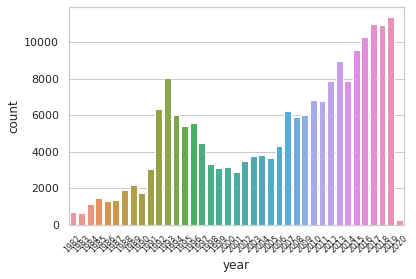

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")
chart = sns.countplot(x="year", data=matches_df4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontsize=8)


Types of the Data in the matches dataset. A mixture of int64 and object types.

In [10]:
matches_df4.dtypes

match_id          int64
date             object
stage            object
best_of           int64
player1_name     object
country_y        object
player2_name     object
score1            int64
score2            int64
country          object
year              int64
name             object
status           object
category         object
prize           float64
country_x        object
city             object
dtype: object

Spread off the Prizepools in snooker tournaments. Majority being very small but but some outliers close to 2 million

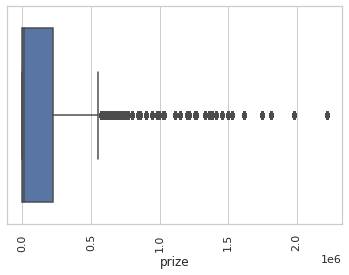

In [11]:
ax = sns.boxplot(x=matches_df4['prize'])
ax.tick_params(axis='x', labelrotation=90)


See where the common countries for playing snooker matches is. England is by far the biggest. England currently hosts the 3 richest and most important professional tournaments in Snooker.

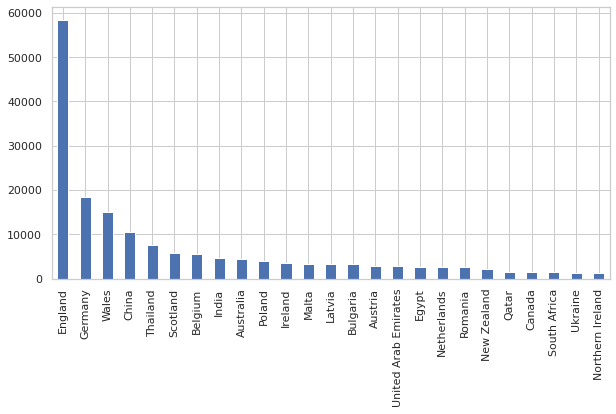

In [12]:
matches_df4.country_x.value_counts().nlargest(25).plot(kind='bar', figsize=(10,5))


Here we can see the most common players in the dataset, Jimmy White, Mark Williams and Ken Doherty all have had very long careers and still even play today. Green represents matches won (as player 1) and red represents matches lost (as player 2). Jimmy White has certainly lost the most matches ever as a snooker player because he has played in so many tournaments throughout a long career and not actually won too many tournaments.

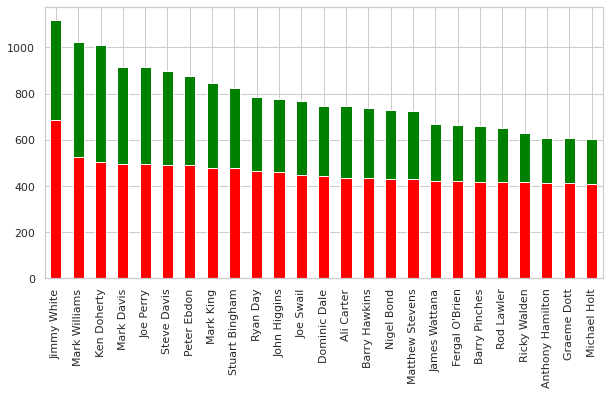

In [13]:
matches_df4.player1_name.value_counts().nlargest(25).plot(kind='bar', figsize=(10,5), color='green')
matches_df4.player2_name.value_counts().nlargest(25).plot(kind='bar', figsize=(10,5), color='red')

Below are the most common match-ups in the dataset. Stephen Hendry and Steve Davis were big rivals in the 1990s. Jimmy White played a lot of big games against them both too. 

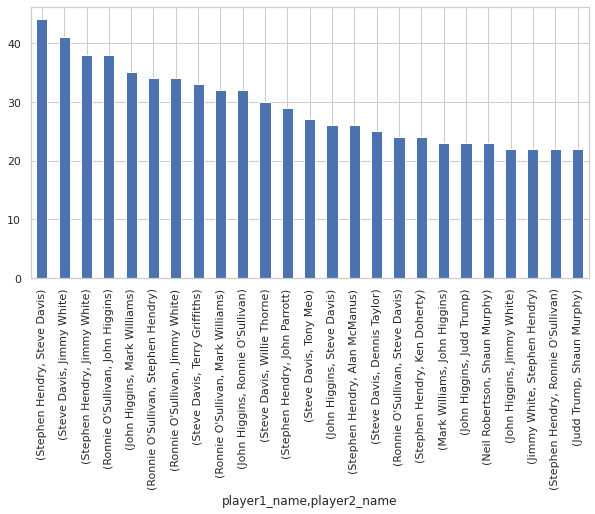

In [14]:
matches_df4[['player1_name', 'player2_name']].value_counts().nlargest(25).plot(kind='bar', figsize=(10,5))

Below is a heatmap that looks at any correlations between the numerical variables. 1 being fully correlated, zero being not correlated at all, -1 being fully negatively correlated.
Score1 correlated to best-of (0.89) but that is expected because the score1 number should be the winners score which should be (best_of + 1) / 2.  ie best of 9 is first to win 5.
Best_off is correlated somewhat to prize (0.54), this would be expected as the bigger tournaments have longer matches in them. Ie the World Championship final is first to 17 frames. 

,match_id,best_of,score1,score2,year,prize
match_id,1.000000,-0.414861,-0.357488,-0.290836,0.502209,-0.333471
best_of,-0.414861,1.000000,0.910733,0.666901,-0.399164,0.625509
score1,-0.357488,0.910733,1.000000,0.678396,-0.352048,0.577293
score2,-0.290836,0.666901,0.678396,1.000000,-0.269413,0.448346
year,0.502209,-0.399164,-0.352048,-0.269413,1.000000,-0.183897
prize,-0.333471,0.625509,0.577293,0.448346,-0.183897,1.000000


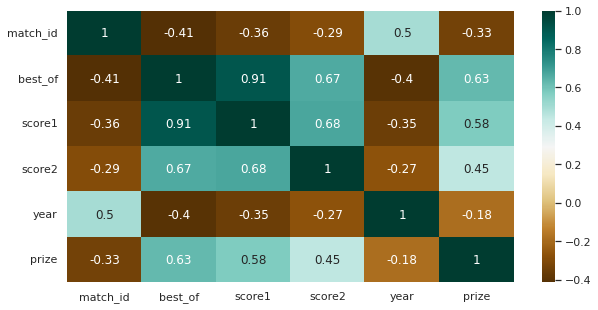

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
c= matches_df4.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

I've plotted score 1 versus score 2 here. 
We see the triangle shape as score 1 is always the winners score. 
There looks to be a single outlier at 0-3 which would need investigation
There also no games first to 13 or 14 frames as these don't happen in the world championship or any other tournament.

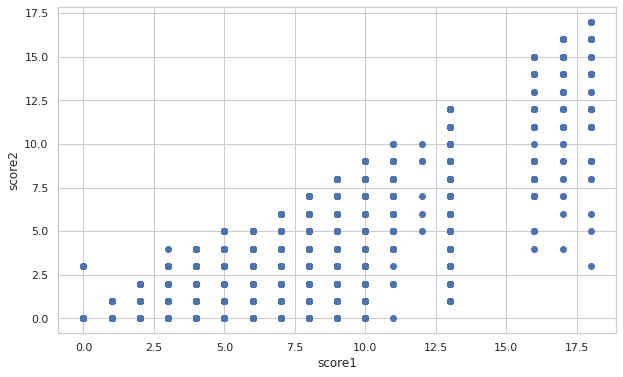

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(matches_df4['score1'], matches_df4['score2'])
ax.set_xlabel('score1')
ax.set_ylabel('score2')
plt.show()

I found a library called sweetviz which produces an interesting html file with some findings from the dataset which i will include in report.

In [17]:
!pip install sweetviz

In [18]:
import sweetviz as sv
#Generating Sweetviz report
report = sv.analyze(matches_df4)
report.show_html("Snooker EDA.html") # specify a name for the report

                                             |          | [  0%]   00:00 -> (? left)

Report Snooker EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Next i Use the scores dataset to gain some insights. It is merged with the last matches dataset to bring in some extra info on the frame. 

In [19]:
scores_df2 = scores_df.merge(matches_df4, how='inner', on=None, left_on='match_id', right_on='match_id', )
scores_df2 = scores_df2[['match_id', 'frame', 'player', 'score', '50plus_breaks_str', 'player1_name', 'player2_name', 'date', 'stage', 'year', 'status', 'category', 'prize', 'country_x', 'city']]
scores_df2

,match_id,frame,player,score,50plus_breaks_str,player1_name,player2_name,date,stage,year,status,category,prize,country_x,city
0,82716,1,1,20,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
1,82716,1,2,58,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
2,82716,2,1,31,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
3,82716,2,2,90,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
4,82716,3,1,56,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933221,203177,3,2,4,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933222,203177,4,1,64,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933223,203177,4,2,75,52,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933224,203177,5,1,69,50,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester


The scores dataframe has players scores on alternative rows so we need to combine them together on the same row. 

In [20]:
scores_df2p1 = scores_df2[scores_df2.player == 1]
scores_df2p1

,match_id,frame,player,score,50plus_breaks_str,player1_name,player2_name,date,stage,year,status,category,prize,country_x,city
0,82716,1,1,20,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
2,82716,2,1,31,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
4,82716,3,1,56,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
6,82716,4,1,26,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
8,82716,5,1,0,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933216,203177,1,1,15,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933218,203177,2,1,111,111,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933220,203177,3,1,88,59,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933222,203177,4,1,64,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester


This player 2 dataset contains their scores in every frame

In [21]:
scores_df2p2 = scores_df2[scores_df2.player == 2]
scores_df2p2

,match_id,frame,player,score,50plus_breaks_str,player1_name,player2_name,date,stage,year,status,category,prize,country_x,city
1,82716,1,2,58,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
3,82716,2,2,90,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
5,82716,3,2,52,NaN,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
7,82716,4,2,87,67,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
9,82716,5,2,114,67,Terry Griffiths,Alex Higgins,NaN,Final,1982,Professional,Non-ranking,47000.0,England,Preston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933217,203177,1,2,81,77,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933219,203177,2,2,0,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933221,203177,3,2,4,NaN,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester
933223,203177,4,2,75,52,Neil Robertson,Mark Selby,2019-10-08,Group 1 - Semi-final,2020,Professional,League,0.0,England,Leicester


And so we combine the two dataframes so we have frame scores for both players. A new column containing the total framescore is also created adding scores from player 1 and 2

In [22]:
scores_dfframe = scores_df2p1.merge(scores_df2p2, how='inner', on=None, left_on=['match_id', 'frame'], right_on=['match_id', 'frame'], )
scores_dfframe = scores_dfframe[['match_id', 'frame', 'player1_name_x', 'score_x', '50plus_breaks_str_x', 'player2_name_x', 'score_y', '50plus_breaks_str_y', 'date_x', 'year_x', 'status_x', 'stage_x', 'category_x', 'prize_x', 'country_x_x', 'city_x']]
scores_dfframe['frametotal'] = scores_dfframe['score_x'] + scores_dfframe['score_y']
scores_dfframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,match_id,frame,player1_name_x,score_x,50plus_breaks_str_x,player2_name_x,score_y,50plus_breaks_str_y,date_x,year_x,status_x,stage_x,category_x,prize_x,country_x_x,city_x,frametotal
0,82716,1,Terry Griffiths,20,NaN,Alex Higgins,58,NaN,NaN,1982,Professional,Final,Non-ranking,47000.0,England,Preston,78
1,82716,2,Terry Griffiths,31,NaN,Alex Higgins,90,NaN,NaN,1982,Professional,Final,Non-ranking,47000.0,England,Preston,121
2,82716,3,Terry Griffiths,56,NaN,Alex Higgins,52,NaN,NaN,1982,Professional,Final,Non-ranking,47000.0,England,Preston,108
3,82716,4,Terry Griffiths,26,NaN,Alex Higgins,87,67,NaN,1982,Professional,Final,Non-ranking,47000.0,England,Preston,113
4,82716,5,Terry Griffiths,0,NaN,Alex Higgins,114,67,NaN,1982,Professional,Final,Non-ranking,47000.0,England,Preston,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466608,203177,1,Neil Robertson,15,NaN,Mark Selby,81,77,2019-10-08,2020,Professional,Group 1 - Semi-final,League,0.0,England,Leicester,96
466609,203177,2,Neil Robertson,111,111,Mark Selby,0,NaN,2019-10-08,2020,Professional,Group 1 - Semi-final,League,0.0,England,Leicester,111
466610,203177,3,Neil Robertson,88,59,Mark Selby,4,NaN,2019-10-08,2020,Professional,Group 1 - Semi-final,League,0.0,England,Leicester,92
466611,203177,4,Neil Robertson,64,NaN,Mark Selby,75,52,2019-10-08,2020,Professional,Group 1 - Semi-final,League,0.0,England,Leicester,139


I've created a summary table inluding the averages by year for the 'Ranking' (professional) events.

In [23]:
scores_dfframemeans = scores_dfframe[scores_dfframe.category_x == 'Ranking'].groupby(['year_x']).mean()
scores_dfframemeans

,match_id,frame,score_x,score_y,prize_x,frametotal
year_x,,,,,,
1982,83158.818830,7.068702,61.251399,44.095165,83524.936387,105.346565
1983,82422.951556,7.128889,62.041333,43.832444,110495.866667,105.873778
1984,81789.147183,6.802838,60.803473,44.367853,154393.593816,105.171326
1985,80439.154025,6.497019,60.798443,43.080987,215279.059291,103.879430
1986,78947.999395,6.523824,59.990924,42.563455,283500.696869,102.554379
1987,77621.015582,6.421436,58.908548,42.526140,321117.891947,101.434688
1988,76015.917204,6.138944,59.334160,42.215791,339412.283342,101.549950
1989,74224.149601,5.585938,59.458612,42.393070,325087.328261,101.851682
1990,72205.104378,5.826073,59.365215,42.576045,379753.509990,101.941260


It can be seen how average frame scores have changed throughout the years in ranking events. The losing score has dropped from 46 to 40. The winning score has fluctuated around 60 but has been on upward trend in the last few years

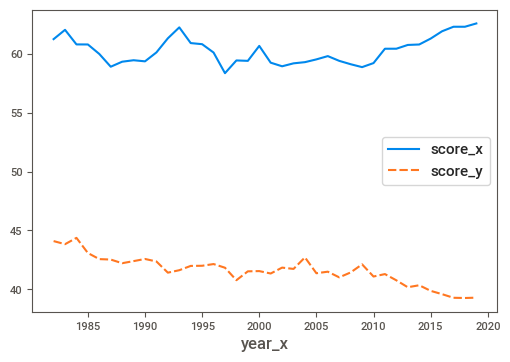

In [24]:

sns.lineplot(data=scores_dfframemeans[['score_x','score_y']])

Below it is focusing on the average total points of frames throughout the years.

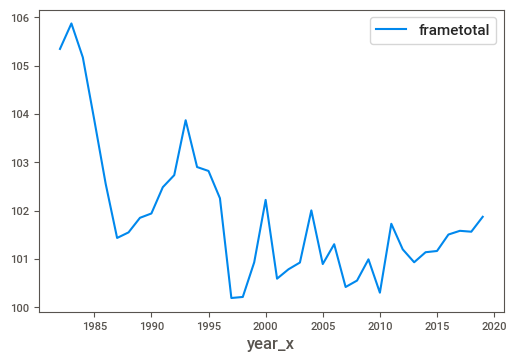

In [25]:
sns.lineplot(data=scores_dfframemeans[['frametotal']])

This is an interesting trend. It has fallen from the 80's but has fluctuated around 101 for the past 25 years. 

Lets look at how the stage of tournament affects the total points

In [26]:
scores_dfframemeans2 = scores_dfframe[scores_dfframe.category_x == 'Ranking'].groupby(['year_x', 'stage_x']).mean()
scores_dfframemeans2

match_id      frame  ...       prize_x  frametotal
year_x stage_x                                     ...                          
1982   Final              83128.714286  12.714286  ...  8.261905e+04  108.571429
       Last 16            83165.967509   8.007220  ...  8.590072e+04  106.202166
       Last 32            83147.328390   6.281780  ...  8.240254e+04  106.347458
       Last 48            83199.264798   6.470405  ...  9.862928e+04  104.532710
       Last 64            83074.000000   4.194872  ...  3.150000e+04  103.487179
...                                ...        ...  ...           ...         ...
2019   Last 80           186326.435644   8.548515  ...  2.220000e+06  102.130693
       Pre-qualifying 1  197912.454545   3.363636  ...  5.531818e+05  102.681818
       Pre-qualifying 2  184496.000000   3.500000  ...  1.770000e+05   81.916667
       Quarter-final     192043.402961   5.815789  ...  7.560444e+05  103.271382
       Semi-final        191877.660057   7.555241  ...  8.340368e+05  105.107649

[385 rows x 6 columns]

The graph describes this below. It is quite crowded and nothing really jumps out.
I'll retry with just the later stages of a tournament

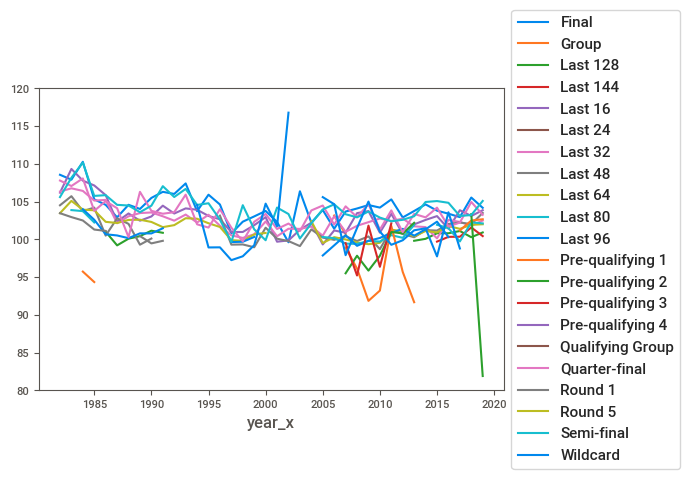

In [27]:
plot = scores_dfframemeans2.unstack('stage_x')['frametotal'].plot(ylim=[80,120])
plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


We filter down to the Last 32 onwards stage of a tournament so we might pull out some insights.

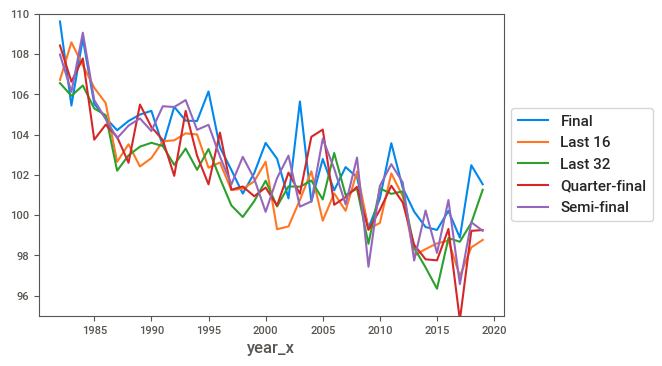

In [28]:

last32onwards = ['Final','Semi-final','Quarter-final','Last 16','Last 32']

scores_dfframemeans3 = scores_dfframe[scores_dfframe['stage_x'].isin(last32onwards)].groupby(['year_x', 'stage_x']).mean()
scores_dfframemeans3
plot3 = scores_dfframemeans3.unstack('stage_x')['frametotal'].plot(ylim=[95,110])
plot3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Again, its quite difficult to pull anything out of that but it looks to me that Finals are slightly higher than the rest throughout the years. I will recreate a summary table without years to confirm this. 

In [29]:
last32onwards = ['Final','Semi-final','Quarter-final','Last 16','Last 32']

scores_dfframemeans4 = scores_dfframe[scores_dfframe['stage_x'].isin(last32onwards)].groupby(['stage_x']).mean()
scores_dfframemeans4

,match_id,frame,score_x,score_y,year_x,prize_x,frametotal
stage_x,,,,,,,
Final,86144.525754,8.117755,59.609196,43.025025,2002.529899,271578.400553,102.634221
Last 16,82602.005441,5.368156,60.475971,40.253286,2005.370130,378982.326455,100.729258
Last 32,76986.048564,5.089717,60.534742,40.294203,2004.829453,401825.626344,100.828945
Quarter-final,82972.628694,5.274868,60.500987,40.670604,2003.541947,306814.273552,101.171592
Semi-final,82436.641037,6.402800,60.315182,41.676727,2002.688949,312042.627611,101.991910


Here, you can see that Finals do indeed have slightly higher point totals than normal matches, 102.6. You can also see that the winning average score is 60.0, which is less than normal but the losing average score is 43.7 which is a few higher points than normal. These close Finals are contributing to the slightly higher frame scores.

In [30]:
scores_dfframemeans5 = scores_dfframe.groupby(['status_x']).mean()
scores_dfframemeans5

,match_id,frame,score_x,score_y,year_x,prize_x,frametotal
status_x,,,,,,,
Amateur,138985.062443,3.103526,58.737859,33.244948,2014.778296,175.571276,91.982807
Pro-am,175285.478292,3.247088,61.318743,35.792093,2014.622309,427.329333,97.110837
Professional,78546.729223,5.189280,60.622702,40.025827,2005.041710,406081.608555,100.648529


The table answers one of the questions i presented in my proposal was to conpare the professional player to the non-professional player. We can clearly see a big different in the frametotals of the split. Professional matches average close to 100.6 points while Amateur are closer to 92 points. Pro-Am which is a mixture of both players predictably are inbetween at 97.1 points. The total points in a frame is not the sole answer of determining the standard of snooker but in general you would expect better players to get bigger breaks and hense have higher scoring frames. Weaker players would miss more shots and have smaller breaks.

Estimating the total points in a frame considering all the other features is my choice of machine learning project. I have taking out the score1 and score2 from the dataset as these make up the total score. I have also omitted the match_id, the 50+ breaks. I have just removed any rows containing NaN as we are still left with 256k rows with 10 columns. Frametotal is the variable we are trying to predict. 

*Had to filter to ranking tournaments as colab was crashing with the full dataset

In [31]:
snookerdf = scores_dfframe[['frame','player1_name_x', 'player2_name_x', 'year_x', 'status_x', 'stage_x', 'category_x', 'prize_x', 'city_x', 'frametotal']]
snookerdf = snookerdf[snookerdf[['frame','player1_name_x', 'player2_name_x', 'year_x', 'status_x', 'stage_x', 'category_x', 'prize_x', 'city_x','frametotal']].notnull().all(1)]
snookerdf = snookerdf[snookerdf['category_x'] == 'Ranking']
snookerdf

,frame,player1_name_x,player2_name_x,year_x,status_x,stage_x,category_x,prize_x,city_x,frametotal
770,1,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,116
771,2,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,105
772,3,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,118
773,4,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,134
774,5,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,133
...,...,...,...,...,...,...,...,...,...,...
464545,5,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,117
464546,6,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,90
464547,7,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,130
464548,8,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,112


Then we separate the framescore column from the dataset. The categorical variables are turned into dummy variables. And the train and test datasets are created using a 80/20 split . 

In [32]:
# the main dataframe without the predicted variable
X = snookerdf.iloc[: , :-1]
X = pd.get_dummies(data=X, drop_first=True)
Y = snookerdf['frametotal']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205556, 1504)
(51389, 1504)
(205556,)
(51389,)


Import the Linear Regression module from Scikit learn package

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


Train the model. This can take some time



In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
# print the intercept
print(model.intercept_)

304.3412053869074


Print the Coefficients

In [36]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
frame,-2.147766e-01
year_x,-9.893203e-02
prize_x,1.051289e-08
player1_name_x_Adam Davies,-1.002692e+01
player1_name_x_Adam Duffy,-1.124857e+00
...,...
city_x_Warrington,2.026697e+00
city_x_Watford,-2.465624e+01
city_x_Wuxi,6.105022e-01
city_x_York,1.021666e+00


In [37]:
predictions = model.predict(X_test)
predictions

array([ 98.80782525, 102.9462058 , 107.06501219, ...,  96.8691005 ,
       101.01888375, 103.83728017])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


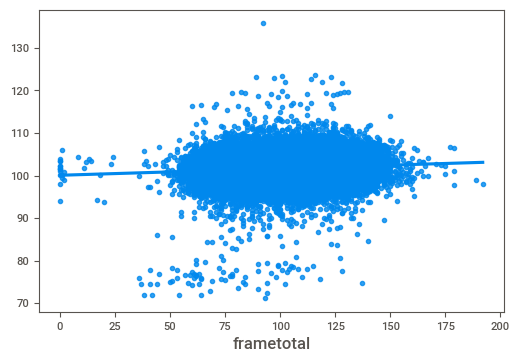

In [38]:
sns.regplot(y_test,predictions)

In [39]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             frametotal   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.249
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:32:20   Log-Likelihood:            -8.9960e+05
No. Observations:              205556   AIC:                         1.802e+06
Df Residuals:                  204055   BIC:                         1.818e+06
Df Model:                        1500                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Lets try a random forrest algorithm to determine whether a frame score is over 101.5 or not. Add an extra column based on frametotal being over 101.5.

In [40]:
snookerdf2 = snookerdf

snookerdf2['Over101.5'] = snookerdf2.apply(lambda row: row.frametotal > 101.5, axis=1)    
snookerdf2
     


,frame,player1_name_x,player2_name_x,year_x,status_x,stage_x,category_x,prize_x,city_x,frametotal,Over101.5
770,1,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,116,True
771,2,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,105,True
772,3,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,118,True
773,4,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,134,True
774,5,Ray Reardon,Jimmy White,1982,Professional,Final,Ranking,31500.0,Birmingham,133,True
...,...,...,...,...,...,...,...,...,...,...,...
464545,5,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,117,True
464546,6,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,90,False
464547,7,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,130,True
464548,8,Niu Zhuang,Simon Lichtenberg,2019,Professional,Last 128,Ranking,395000.0,Berlin,112,True


Run the random forrest algorithm. A training-test split of 75.25 is used. The frametotal column is also dropped as that gives away the Over101.5 value.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


X1 = snookerdf2.iloc[: , :-2]
X1 = pd.get_dummies(data=X1, drop_first=True)
Y1 = snookerdf2['Over101.5']

X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.25,random_state=0)


clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


The confusion matrix with percentages lets us know how many were classified correctly or not. 

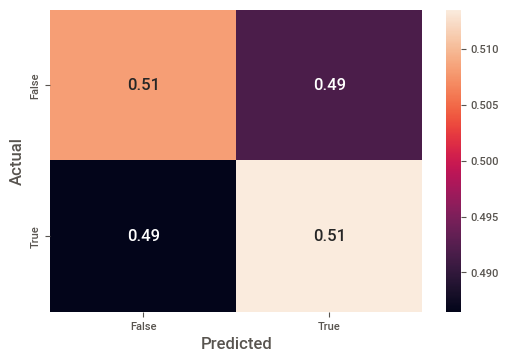

In [42]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],normalize = "index")
sn.heatmap(confusion_matrix, annot=True)

51.0% Accuracy which is just slightly better than a pure guess which would be 50% Accuracy.
Clearly a lot of tweaking is needed for a model like this for it to be useful.

In [43]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.5108426607718293
